In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets

#### K-Nearest Neighbours Algo

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png" height = 400 width=400>

`Source`:`IBM`

In [83]:
data = datasets.load_breast_cancer()

In [91]:
print('Features of data: ', data.feature_names)
print()
print('Target classes of data: ', data.target_names)

Features of data:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target classes of data:  ['malignant' 'benign']


In [92]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.25, random_state = 0)

In [95]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
clf.score(x_test,y_test)

0.9370629370629371

In [98]:
clf.n_neighbors # the model has taken k=5 by default

5

In [99]:
# To find optimal k, we will use cross validation

In [111]:
scores = []
for i in range(1,26, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, x_train,y_train, cv = 3)
    print(i,' : ',score.mean())
    scores.append(score.mean())

1  :  0.9248826291079811
3  :  0.9295774647887324
5  :  0.931924882629108
7  :  0.931924882629108
9  :  0.9295774647887324
11  :  0.92018779342723
13  :  0.9154929577464789
15  :  0.9131455399061034
17  :  0.9131455399061034
19  :  0.9178403755868545
21  :  0.9154929577464789
23  :  0.9107981220657276
25  :  0.9061032863849765


In [ ]:
# Here the most optimal k's value is 7

#### Another method

In [24]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [25]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [26]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

`Standardize the dataset`

In [27]:
x.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2


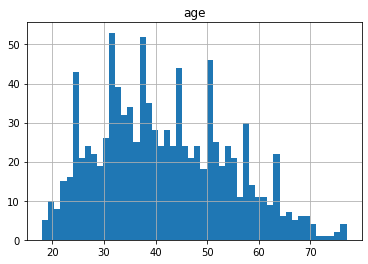

In [28]:
df.hist(column='age', bins=50)
plt.show()

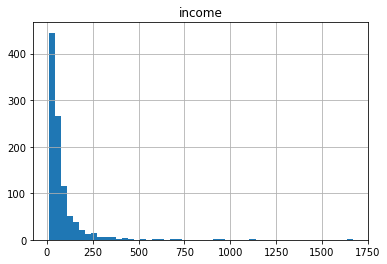

In [29]:
df.hist(column='income', bins=50)
plt.show()

In [41]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [45]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


In [48]:
k = 4
model = KNeighborsClassifier(n_neighbors = k)
model.fit(x_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [51]:
y_pred = model.predict(x_test)

In [56]:
print("Train set Accuracy: ",model.score(x_train,y_train))
print("Test set Accuracy: ", model.score(x_test, y_test))

Train set Accuracy:  0.556
Test set Accuracy:  0.32


`Accuracy of model with k=4 is really bad. So we need to build a model again with a better k`

In [57]:
k = 6
model = KNeighborsClassifier(n_neighbors = k)
model.fit(x_train,y_train)
print("Train set Accuracy: ",model.score(x_train,y_train))
print("Test set Accuracy: ", model.score(x_test, y_test))

Train set Accuracy:  0.5226666666666666
Test set Accuracy:  0.324


` We will create a method which would show us the best optimal k for our data so we dont have to manually check through diff values of k`

In [71]:
K = 12
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for k in range(1,K):
    model = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test,y_pred)
    std_acc[k-1] =  np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

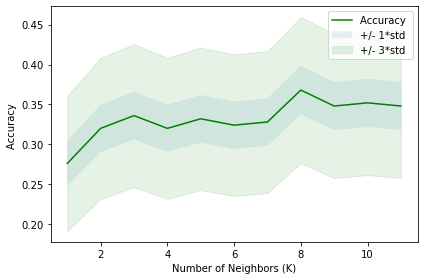

In [80]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1*std','+/- 3*std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [81]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.368 with k= 8
